# Diabetes prediction using Classification

###### Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
###### We will explore this dataset and find out factors that contribute the most for diabetes causation. We will also build Machine Learning Models that can help to predict whether a person is diabetic or not and try to improve the model by performing Cross Validation  

In [1]:
import numpy as np    # for mathematical operations
import pandas as pd   # for data processing and reading the csv file
import matplotlib.pyplot as plt    # for data visualozations
import seaborn as sns     # for Data visualizations

In [2]:
import os
os.getcwd() # to get the current working directory

'C:\\Users\\arman\\Documents'

In [3]:
diabetes = pd.read_csv("D:\Downloads\diabetes.csv") # fro reading the csv file

In [4]:
diabetes.head() # for viewing the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### ==========================================================================================================

###### The different columns present in the dataset are:

###### Pregnancies -> Number of times Pregnant

###### Glucose -> Plasma glucose concentration

###### BloodPressure -> Diastolic blood pressure (mm Hg)

###### SkinThickness -> Triceps skin fold thickness (mm)

###### Insulin -> 2-Hour serum insulin (mu U/ml)

###### BMI -> Body Mass Index

###### DiabetesPedigreeFunction -> Diabetes pedigree function

###### Age -> Age in years

###### Outcome -> Whether the lady is diabetic or not, 0 represents the person is not diabetic and 1 represents
###### that the person is diabetic.

#### ==========================================================================================================

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## exploratory data analysis:
### 1.Getting to know the data
### 2.Data preprocessing (Missing Values)
### 3.Cross tables and data visualization

#### ====================================== Getting to know the data =============================================

In [5]:
diabetes.info() # getting to know about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.columns # to get the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
summary_numerical = diabetes.describe().T # to get a summary of Numerical data
summary_numerical

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Checking the missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes["Outcome"].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

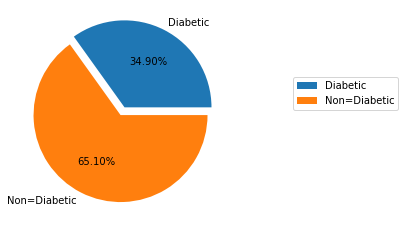

In [10]:
labels=["Diabetic","Non=Diabetic"]
series=[268,500]
explode=(0.1,0)
plt.pie(series,explode=explode,labels=labels,autopct="%2.2f%%",shadow=False)
plt.legend(bbox_to_anchor=(1.8,0.7))

In [11]:
np.unique(diabetes["Outcome"]) #Checking the categories present in our target variable

array([0, 1], dtype=int64)

In [12]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### ====================================== Data pre-processing =============================================

In [13]:
columns=diabetes.drop("Outcome",axis=1).columns # getting all the columns except target column
list(enumerate(columns))

[(0, 'Pregnancies'),
 (1, 'Glucose'),
 (2, 'BloodPressure'),
 (3, 'SkinThickness'),
 (4, 'Insulin'),
 (5, 'BMI'),
 (6, 'DiabetesPedigreeFunction'),
 (7, 'Age')]

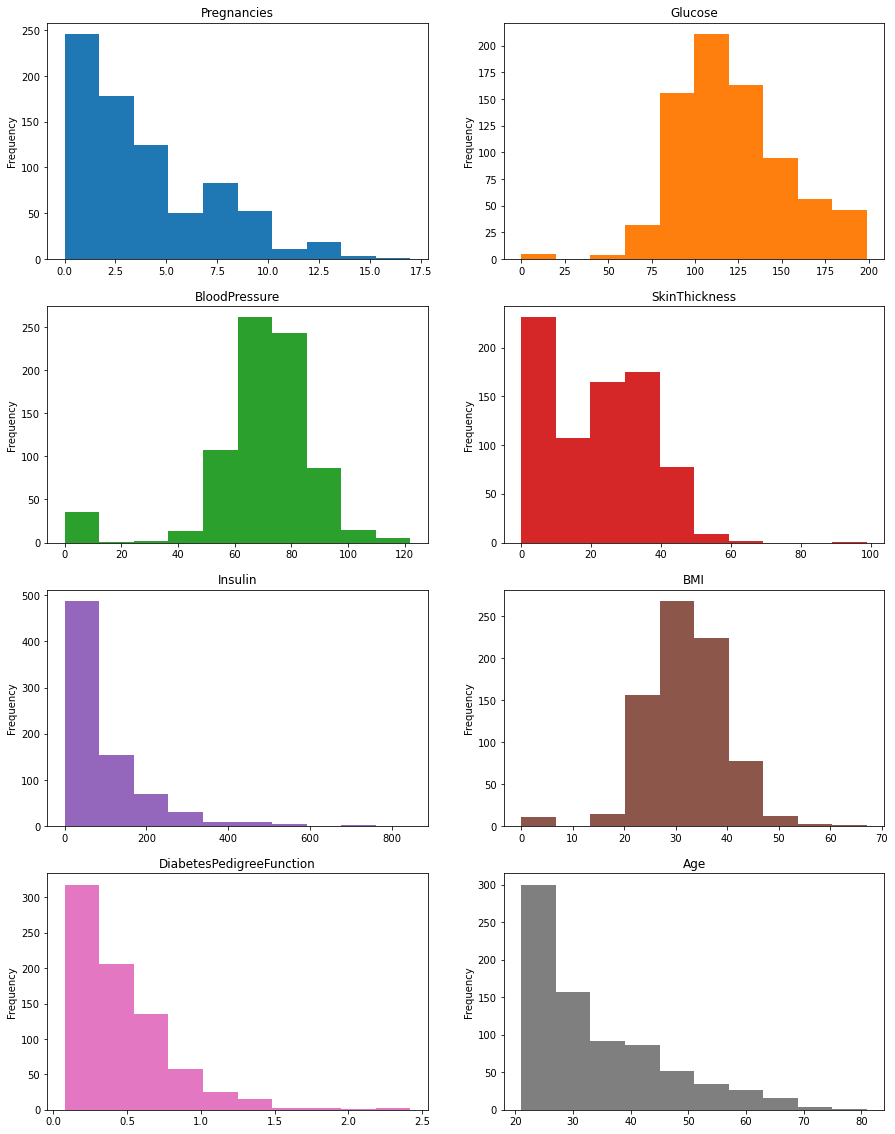

In [14]:
from itertools import cycle 
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color']) # for iterating the color cycle
plt.figure(figsize=(15,20))  # deciding figure size

# Plotting the subplots to see the data

for i in enumerate(columns):
    plt.subplot(4,2,i[0]+1)
    diabetes[i[1]].plot(kind = 'hist', title = i[1], color = next(color_cycle))

In [15]:
# here we are checking the minimum values
for col in columns:
    print("The minimum value of {} is {}".format(col,diabetes[col].min()))

The minimum value of Pregnancies is 0
The minimum value of Glucose is 0
The minimum value of BloodPressure is 0
The minimum value of SkinThickness is 0
The minimum value of Insulin is 0
The minimum value of BMI is 0.0
The minimum value of DiabetesPedigreeFunction is 0.078
The minimum value of Age is 21


###### You might be wondering that there are no null values in the dataset, but are you sure? in the previous section where certain columns were having zero as their minima eventhough they aren't supposed to. Those values will be considered as null values. Let's replace the zeros present in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with null.

In [16]:
# Here we are converting the 0's to null values
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = diabetes[['Glucose', 'BloodPressure','SkinThickness'
                                                                                     , 'Insulin','BMI']].replace(0,np.nan)

In [17]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

###### ===================================================================================================================

###### Let's check the skewness of each of the columns.

###### Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. The peak of the histogram represents the mode

In [18]:
from scipy.stats import skew 
for col in columns:
    print("The Skewness of {} is {}".format(col,diabetes[col].skew()))

The Skewness of Pregnancies is 0.9016739791518588
The Skewness of Glucose is 0.5309885349396285
The Skewness of BloodPressure is 0.13415273171959252
The Skewness of SkinThickness is 0.690619013984192
The Skewness of Insulin is 2.166463843812443
The Skewness of BMI is 0.5939697505712673
The Skewness of DiabetesPedigreeFunction is 1.919911066307204
The Skewness of Age is 1.1295967011444805


###### ===================================================================================================================

###### Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.

In [19]:
diabetes["Insulin"] = diabetes["Insulin"].fillna(diabetes["Insulin"].median())

for col in ['Glucose', 'BloodPressure', 'SkinThickness','BMI']:
    diabetes[col] = diabetes[col].fillna(diabetes[col].mean())

In [20]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# here we are checking the correlation between columns
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.154678,0.542398,0.100966,0.127872,0.215299
Insulin,0.025047,0.419064,0.045087,0.154678,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.542398,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.203790,0.311924,0.173844,0.238356,1.000000


#### ====================================== Cross-tab and data visualization =============================================

In [22]:
# outcome proportion table
outcome = pd.crosstab(index=diabetes["Outcome"],columns="Count",normalize=True)
outcome

col_0,Count
Outcome,
0,0.651042
1,0.348958


In [23]:
group=diabetes.groupby("Outcome").mean()["Pregnancies"]
group

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

#### We can see that the number of pregnancies is high for the diabetic people

<AxesSubplot:xlabel='count', ylabel='Pregnancies'>

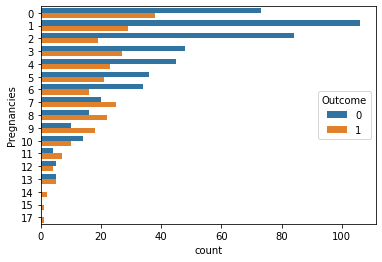

In [24]:
sns.countplot(y=diabetes["Pregnancies"],hue=diabetes["Outcome"])

C:\Users\arman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

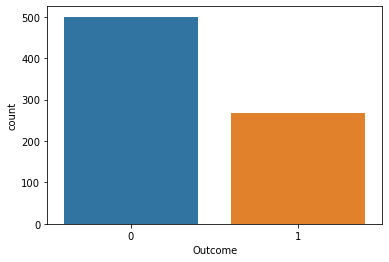

In [25]:
sns.countplot(diabetes["Outcome"])

In [26]:
group1 = diabetes.groupby("Outcome").mean()["Insulin"]
group1

Outcome
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

#### Diabetic People tend to have more Insulin level.

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

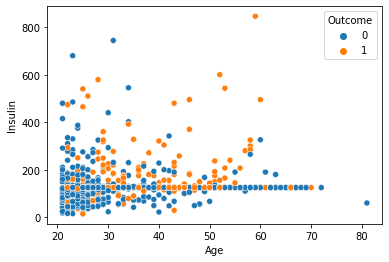

In [27]:
# Age vs Insulin scatter plot
sns.scatterplot(x="Age",y="Insulin",hue="Outcome",data=diabetes)

#### Here we can clearly see that Age and insulin are negatively correlated

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

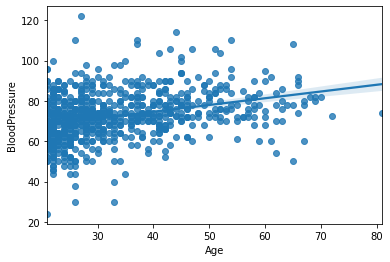

In [28]:
#Age vs Blood pressure scatterplot
sns.regplot(x="Age",y="BloodPressure",data=diabetes)

#### as the age increases, generally the Blood Pressure also increases

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

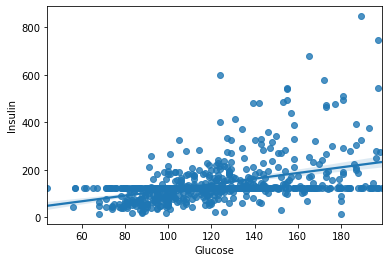

In [29]:
#glucose vs insulin regplot
sns.regplot(y="Insulin",x="Glucose",data=diabetes)

#### as the Glucose level increases, generally the Insulin level also increases

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

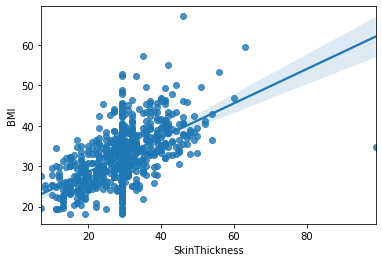

In [30]:
#Skin Thikness vs BMI regplot()
sns.regplot(x="SkinThickness",y="BMI",data=diabetes)

#### BMI and Skin thickness are positively correlated

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

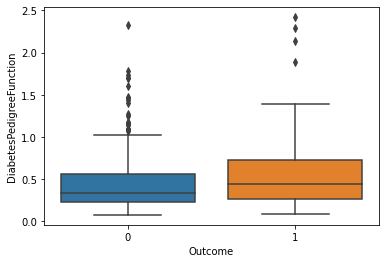

In [31]:
#DPF vs Outcome boxplot
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction",data=diabetes)

####  the diabetic people have DPF value close to 0.5 (50th Percentile)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

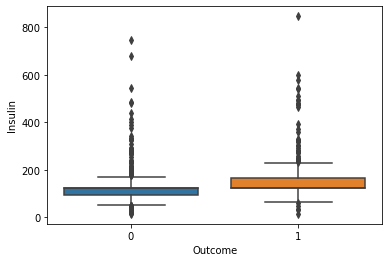

In [32]:
#Insulin vs Outcome boxplot
sns.boxplot(x="Outcome",y="Insulin",data=diabetes)

#### The diabetic people have more insulin level than non diabetic

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

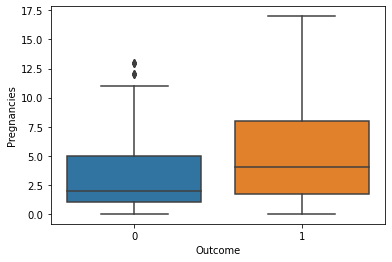

In [33]:
#pregnancies vs Outcome boxplot
sns.boxplot(x="Outcome",y="Pregnancies",data=diabetes)

#### the diabetic people have number of pregnancies close to 5.0 (50 percentile)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

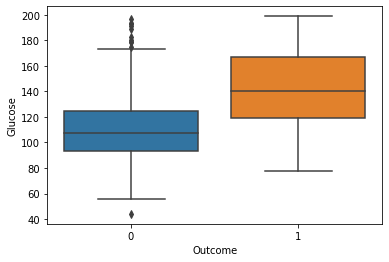

In [34]:
#Glucose vs Outcome boxplot
sns.boxplot(x="Outcome",y="Glucose",data=diabetes)

#### the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

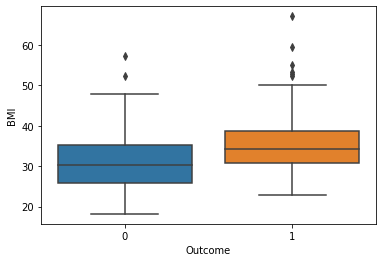

In [35]:
#BMI vs outcome boxplot
sns.boxplot(x="Outcome",y="BMI",data=diabetes)

####  the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people

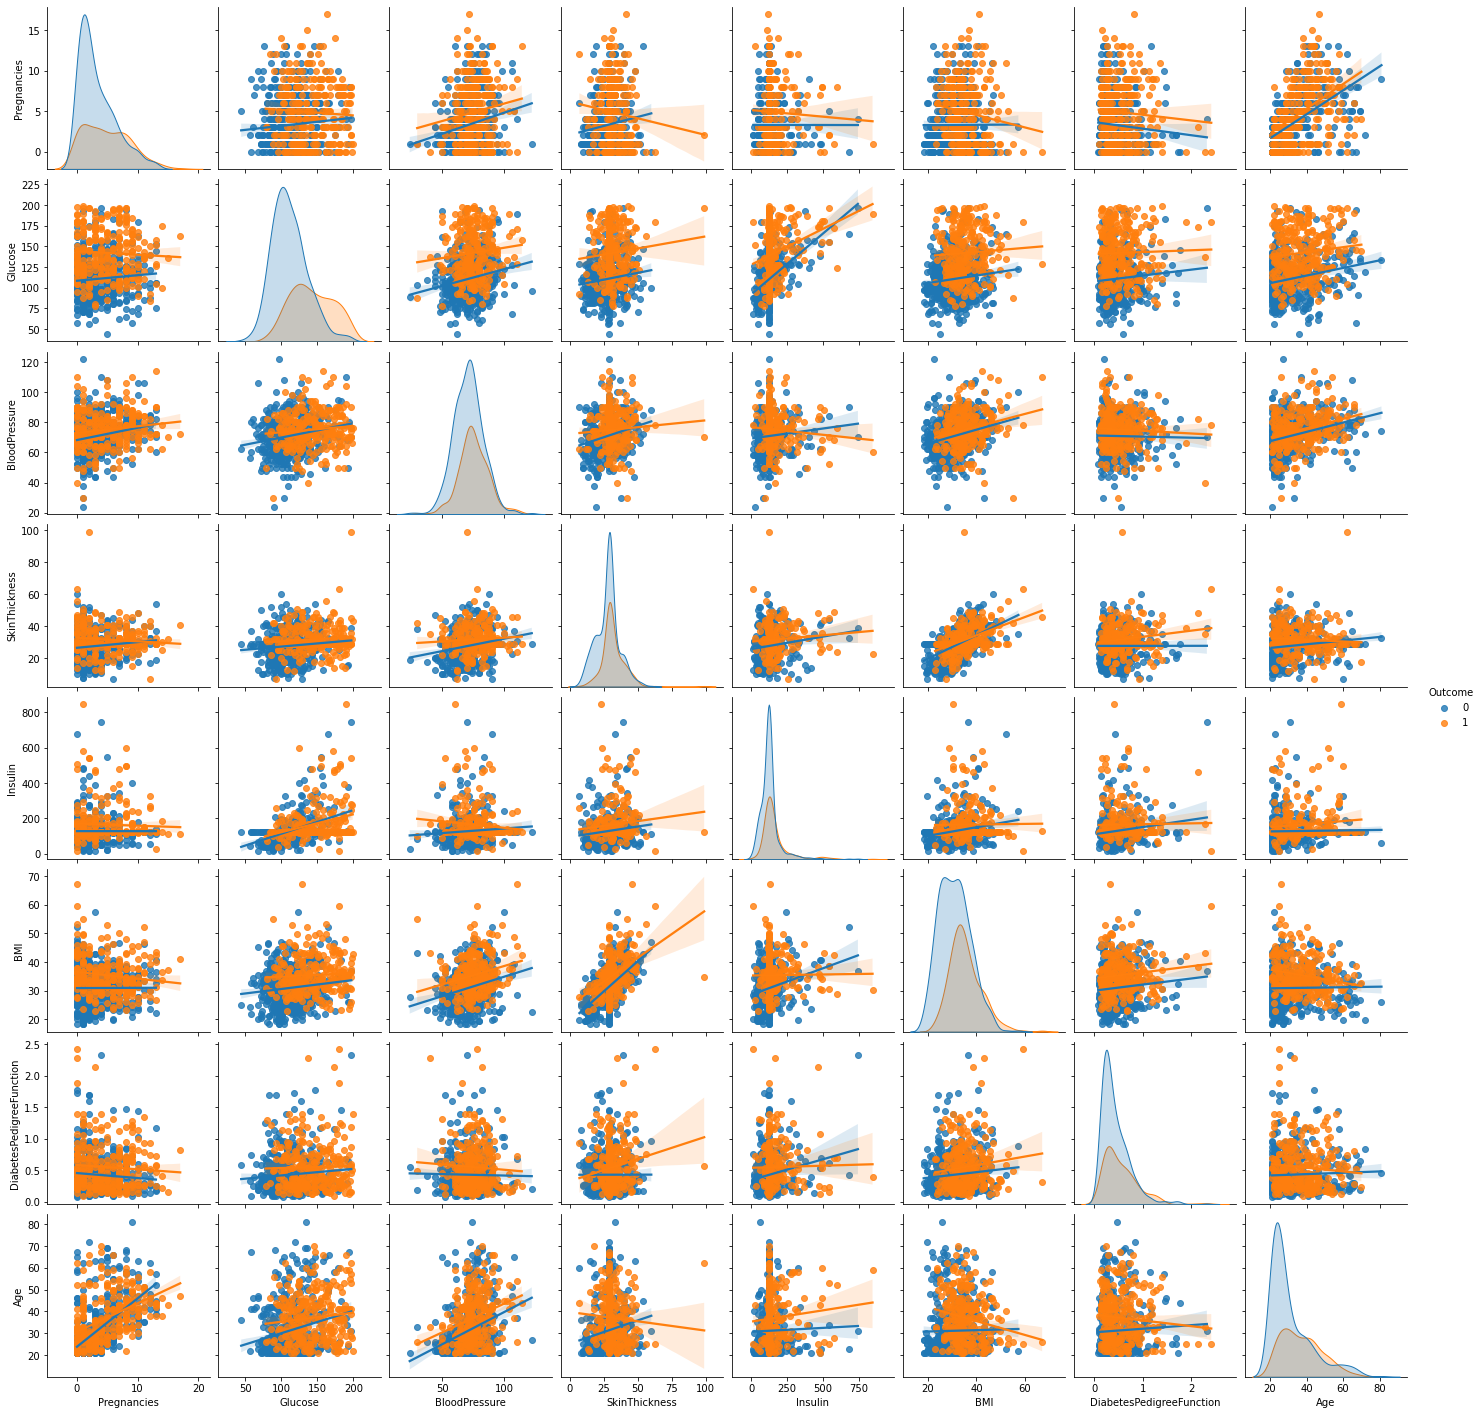

In [37]:
sns.pairplot(diabetes,kind="reg",hue="Outcome")

#### Now let's split the dataset into train and test

In [36]:
from sklearn.model_selection import train_test_split

x = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.3)

In [37]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
495,6,166.0,74.0,29.15342,125.0,26.6,0.304,66
493,4,125.0,70.0,18.00000,122.0,28.9,1.144,45
258,1,193.0,50.0,16.00000,375.0,25.9,0.655,24
212,7,179.0,95.0,31.00000,125.0,34.2,0.164,60
223,7,142.0,60.0,33.00000,190.0,28.8,0.687,61


In [38]:
y_train.head()

495    0
493    1
258    0
212    0
223    0
Name: Outcome, dtype: int64

In [39]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
679,2,101.0,58.0,17.0,265.0,24.2,0.614,23
345,8,126.0,88.0,36.0,108.0,38.5,0.349,49
486,1,139.0,62.0,41.0,480.0,40.7,0.536,21
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27
457,5,86.0,68.0,28.0,71.0,30.2,0.364,24


In [40]:
y_test.head()

679    0
345    0
486    0
20     0
457    0
Name: Outcome, dtype: int64

In [41]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (537, 8)
Shape of y_train (537,)
Shape of x_test (231, 8)
Shape of y_test (231,)


In [42]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.769088,122.290032,72.634448,29.162311,142.450652,32.384441,0.476324,32.860335
std,3.235002,29.887045,11.975096,9.092365,90.679822,7.059959,0.342501,11.189224
min,0.000000,57.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,101.000000,64.000000,25.000000,125.000000,27.400000,0.245000,24.000000
50%,3.000000,118.000000,72.405184,29.153420,125.000000,32.000000,0.380000,29.000000
75%,6.000000,142.000000,80.000000,32.000000,125.000000,36.500000,0.624000,39.000000
max,17.000000,197.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


In [43]:
x_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,4.021645,120.284358,71.872221,29.132751,136.536797,32.627218,0.461537,34.125541
std,3.664692,31.697220,12.383519,8.065604,75.477997,6.436631,0.304233,12.973779
min,0.000000,44.000000,24.000000,10.000000,16.000000,18.200000,0.085000,21.000000
25%,1.000000,97.500000,64.000000,25.500000,115.000000,27.800000,0.235000,24.000000
50%,3.000000,115.000000,72.000000,29.153420,125.000000,32.457464,0.364000,29.000000
75%,6.000000,138.500000,80.000000,32.000000,142.500000,36.700000,0.630500,42.000000
max,14.000000,199.000000,114.000000,52.000000,600.000000,57.300000,1.893000,81.000000


In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                                        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x_test=pd.DataFrame(sc.fit_transform(x_test),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                                        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [45]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,4.972228e-17,-2.215277e-16,-1.448872e-15,4.209337e-16,-1.058537e-16,-3.717283e-16,-2.480945e-17,3.380288e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.166182e+00,-2.186596e+00,-3.563579e+00,-2.439736e+00,-1.417850e+00,-2.011013e+00,-1.164069e+00,-1.060967e+00
25%,-8.567752e-01,-7.130140e-01,-7.217060e-01,-4.582077e-01,-1.926219e-01,-7.066738e-01,-6.760256e-01,-7.926016e-01
50%,-2.379611e-01,-1.436754e-01,-1.916289e-02,-9.787702e-04,-1.926219e-01,-5.450448e-02,-2.814991e-01,-3.453264e-01
75%,6.902601e-01,6.600969e-01,6.156460e-01,3.123868e-01,-1.926219e-01,5.834873e-01,4.315710e-01,5.492239e-01
max,4.093738e+00,2.502075e+00,4.126195e+00,7.688077e+00,7.765844e+00,4.921831e+00,5.680235e+00,3.501240e+00


In [46]:
x_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.336113e-16,3.772836e-17,2.326182e-16,1.254408e-16,-1.339717e-16,4.969570e-16,1.153478e-17,-5.959639e-17
std,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00
min,-1.099786e+00,-2.411884e+00,-3.874196e+00,-2.377292e+00,-1.600447e+00,-2.246291e+00,-1.240348e+00,-1.013895e+00
25%,-8.263197e-01,-7.203734e-01,-6.370819e-01,-4.513784e-01,-2.859584e-01,-7.515889e-01,-7.462338e-01,-7.821568e-01
50%,-2.793860e-01,-1.670756e-01,1.034092e-02,2.568150e-03,-1.531817e-01,-2.643041e-02,-3.212955e-01,-3.959271e-01
75%,5.410144e-01,5.759243e-01,6.577637e-01,3.562629e-01,7.917742e-02,6.341247e-01,5.565809e-01,6.082698e-01
max,2.728749e+00,2.488754e+00,3.409311e+00,2.841313e+00,6.153709e+00,3.841507e+00,4.715376e+00,3.620861e+00


## Here we can see that our data is scaled properly

#### ==========================================================================================================

## Model selection

In [47]:
#Importing evaluation libraries
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score

In [48]:
"""
This function will evaluate the models
"""

def evaluate(model,x_train,y_train,x_test,y_test,train=True):
    if train == True:
        y_pred=model.predict(x_train)
        classifier_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))
        print("Train Results :\n ==========================================================")
        print(f"Accuracy Score : {(accuracy_score(y_train,y_pred))*100}")
        print("------------------------------------------------------")
        print(f"f1 accuracy Score : {round(f1_score(y_train,y_pred)*100,2)}")
        print("------------------------------------------------------")
        print(f"Classification Report :\n{classifier_report}")
        print("------------------------------------------------------")
        print(f"Confusion Matrix : \n{confusion_matrix(y_train,y_pred)*100}\n")
    if train == False:
        y_pred=model.predict(x_test)
        classifier_report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
        print("Test Results :\n ==========================================================")
        print(f"Accuracy Score : {(accuracy_score(y_test,y_pred))*100}")
        print("------------------------------------------------------")
        print(f"f1 accuracy Score : {round(f1_score(y_test,y_pred)*100,2)}")
        print("------------------------------------------------------")
        print(f"Classification Report :\n{classifier_report}")
        print("------------------------------------------------------")
        print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)*100}\n")

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

evaluate(lr,x_train,y_train,x_test,y_test,train=True)
print()
evaluate(lr,x_train,y_train,x_test,y_test,train=False)

Train Results :
Accuracy Score : 79.14338919925513
------------------------------------------------------
f1 accuracy Score : 67.06
------------------------------------------------------
Classification Report :
                    0           1  accuracy   macro avg  weighted avg
precision    0.803618    0.760000  0.791434    0.781809      0.788185
recall       0.896254    0.600000  0.791434    0.748127      0.791434
f1-score     0.847411    0.670588  0.791434    0.759000      0.784848
support    347.000000  190.000000  0.791434  537.000000    537.000000
------------------------------------------------------
Confusion Matrix : 
[[31100  3600]
 [ 7600 11400]]


Test Results :
Accuracy Score : 74.89177489177489
------------------------------------------------------
f1 accuracy Score : 58.57
------------------------------------------------------
Classification Report :
                    0          1  accuracy   macro avg  weighted avg
precision    0.781065   0.661290  0.748918    0.7211

##### The F1 score we got using Logistic Regression is very less, and in the Confusion Matrix it is visible that Many wrong predictions has been made. We need to improve it

In [50]:
train_score_lr=round(accuracy_score(y_train,lr.predict(x_train))*100,2)
test_score_lr=round(accuracy_score(y_test,lr.predict(x_test))*100,2)
roc_score_lr=round(roc_auc_score(y_train,lr.predict(x_train))*100,2)

## KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

evaluate(knn,x_train,y_train,x_test,y_test,train=True)
print()
evaluate(knn,x_train,y_train,x_test,y_test,train=False)

Train Results :
Accuracy Score : 82.68156424581005
------------------------------------------------------
f1 accuracy Score : 74.52
------------------------------------------------------
Classification Report :
                    0           1  accuracy   macro avg  weighted avg
precision    0.850829    0.777143  0.826816    0.813986      0.824757
recall       0.887608    0.715789  0.826816    0.801699      0.826816
f1-score     0.868829    0.745205  0.826816    0.807017      0.825089
support    347.000000  190.000000  0.826816  537.000000    537.000000
------------------------------------------------------
Confusion Matrix : 
[[30800  3900]
 [ 5400 13600]]


Test Results :
Accuracy Score : 74.89177489177489
------------------------------------------------------
f1 accuracy Score : 63.75
------------------------------------------------------
Classification Report :
                    0          1  accuracy   macro avg  weighted avg
precision    0.818792   0.621951  0.748918    0.7203

In [52]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


In [54]:
train_score_knn=round(accuracy_score(y_train,knn.predict(x_train))*100,2)
test_score_knn=round(accuracy_score(y_test,knn.predict(x_test))*100,2)
roc_score_knn=round(roc_auc_score(y_train,knn.predict(x_train))*100,2)

## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier


dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

evaluate(dtc,x_train,y_train,x_test,y_test,train=True)
print()
evaluate(dtc,x_train,y_train,x_test,y_test,train=False)

Train Results :
Accuracy Score : 100.0
------------------------------------------------------
f1 accuracy Score : 100.0
------------------------------------------------------
Classification Report :
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    347.0  190.0       1.0      537.0         537.0
------------------------------------------------------
Confusion Matrix : 
[[34700     0]
 [    0 19000]]


Test Results :
Accuracy Score : 65.36796536796537
------------------------------------------------------
f1 accuracy Score : 52.38
------------------------------------------------------
Classification Report :
                    0          1  accuracy   macro avg  weighted avg
precision    0.758865   0.488889   0.65368    0.623877      0.667704
recall       0.699346   0.564103   0.65368    0.63

In [56]:
train_score_dtc=round(accuracy_score(y_train,dtc.predict(x_train))*100,2)
test_score_dtc=round(accuracy_score(y_test,dtc.predict(x_test))*100,2)
roc_score_dtc=round(roc_auc_score(y_train,dtc.predict(x_train))*100,2)

## Support vector Machine

In [57]:
from sklearn.svm import SVC


svm=SVC()
svm.fit(x_train,y_train)

evaluate(svm,x_train,y_train,x_test,y_test,train=True)
print()
evaluate(svm,x_train,y_train,x_test,y_test,train=False)

Train Results :
Accuracy Score : 82.30912476722533
------------------------------------------------------
f1 accuracy Score : 71.98
------------------------------------------------------
Classification Report :
                    0           1  accuracy   macro avg  weighted avg
precision    0.824742    0.818792  0.823091    0.821767      0.822637
recall       0.922190    0.642105  0.823091    0.782148      0.823091
f1-score     0.870748    0.719764  0.823091    0.795256      0.817327
support    347.000000  190.000000  0.823091  537.000000    537.000000
------------------------------------------------------
Confusion Matrix : 
[[32000  2700]
 [ 6800 12200]]


Test Results :
Accuracy Score : 75.75757575757575
------------------------------------------------------
f1 accuracy Score : 61.11
------------------------------------------------------
Classification Report :
                    0          1  accuracy   macro avg  weighted avg
precision    0.793939   0.666667  0.757576    0.7303

In [58]:
train_score_svm=round(accuracy_score(y_train,svm.predict(x_train))*100,2)
test_score_svm=round(accuracy_score(y_test,svm.predict(x_test))*100,2)
roc_score_svm=round(roc_auc_score(y_train,svm.predict(x_train))*100,2)

In [59]:
models={
    "Train Accuracy":[train_score_lr,train_score_knn,train_score_dtc,train_score_svm],
    "Test Accuracy":[test_score_lr,test_score_knn,test_score_dtc,test_score_svm],
    "roc auc Score":[roc_score_lr,roc_score_knn,roc_score_dtc,roc_score_svm]
}

model=pd.DataFrame(models,index=["Logistic Regression","KNN Classifier","Decision Tree classifier","Support vector classifier"])
model

,Train Accuracy,Test Accuracy,roc auc Score
Logistic Regression,79.14,74.89,74.81
KNN Classifier,82.68,74.89,80.17
Decision Tree classifier,100.00,65.37,100.00
Support vector classifier,82.31,75.76,78.21


#### We can observe from the above dataframe that Decision Tree Classifier have overfitted the given dataset
#### Hence by viewing the data we can conclude that KNN Classifier done the good work for classifying the data